# DATOS ABIERTOS DE LA CIUDAD DE MÉXICO

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## For plotting
import plotly.express as px
import plotly.graph_objects as go
import plotly.tools

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
carpetas = pd.read_csv('carpetas_completa_abril_2021.csv')

/Users/anieto/miniconda3/envs/zsessions/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning:

Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.



In [11]:
carpetas.head(2)

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo
0,2016.0,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01 00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,LAGO PTE.,AMÉRICAS UNIDAS,BENITO JUAREZ,NaN,-99.140215,19.380315,NaN
1,2016.0,Enero,2016-01-31 20:50:00,2016,Febrero,2016-02-01 00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SUR 25 A,GRANJEROS,LOS CIPRESES,IZTAPALAPA,NaN,-99.108403,19.352859,NaN


#### ¿Cuántos delitos registrados hay en la tabla? ¿Qué rango de tiempo consideran los datos?

In [4]:
carpetas.shape

(1208358, 19)

In [14]:
carpetas['fecha_inicio'] = pd.to_datetime(carpetas['fecha_inicio'])
carpetas['fecha_hechos'] = pd.to_datetime(carpetas['fecha_hechos'])

In [72]:
carpetas['mes_carpeta'] =  pd.to_datetime(carpetas['fecha_inicio']).dt.month
carpetas['anio_carpeta'] =  pd.to_datetime(carpetas['fecha_inicio']).dt.year

In [16]:
carpetas['fecha_inicio'].min()

Timestamp('2016-01-01 01:35:06')

In [17]:
carpetas['fecha_inicio'].max()

Timestamp('2021-04-30 23:58:49')

In [18]:
carpetas.delito.nunique()

341

Tenemos 1,208,358 delitos registrados de los cuales 341 son diferentes entre el 1 de enero de 2016 y el 30 de abril de 2021.

#### ¿Cómo se distribuye el número de delitos en la CDMX? ¿Cuáles son los 5 delitos más frecuentes?

In [35]:
import seaborn as sns
sns.set(rc={"figure.figsize":(8, 10)})

In [39]:
carpetas.groupby('delito')['delito'].count().sort_values(ascending=False).head()

delito
VIOLENCIA FAMILIAR              122800
FRAUDE                           73743
ROBO DE OBJETOS                  70808
ROBO A NEGOCIO SIN VIOLENCIA     66177
AMENAZAS                         64353
Name: delito, dtype: int64

In [31]:
c = carpetas.groupby('delito')['delito'].count().sort_values(ascending=False).head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'VIOLENCIA FAMILIAR'),
  Text(1, 0, 'FRAUDE'),
  Text(2, 0, 'ROBO DE OBJETOS'),
  Text(3, 0, 'ROBO A NEGOCIO SIN VIOLENCIA'),
  Text(4, 0, 'AMENAZAS'),
  Text(5, 0, 'ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA'),
  Text(6, 0, 'DENUNCIA DE HECHOS'),
  Text(7, 0, 'ROBO DE ACCESORIOS DE AUTO'),
  Text(8, 0, 'ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO'),
  Text(9, 0, 'ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA')])

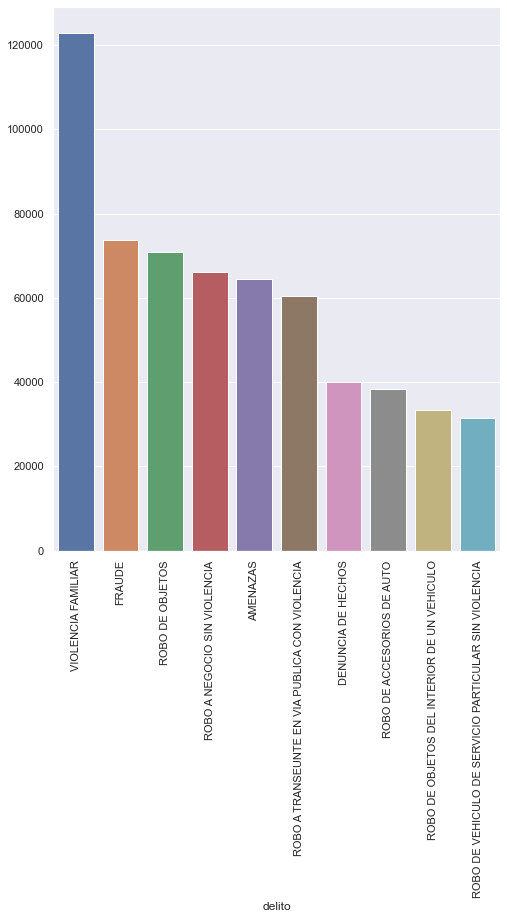

In [38]:
sns.barplot(x=c.index, y=c.values)
plt.xticks(rotation=90)

La variable "delito" es categorica con 341 clases de delitos. Su distribución se puede ordenar para mostrar los delitos más frecuentes.

Estos son:

1. VIOLENCIA FAMILIAR  con            122800 registros
2. FRAUDE                           con 73743 registros
3. ROBO DE OBJETOS                  con 70808 registros
4. ROBO A NEGOCIO SIN VIOLENCIA     con 66177 registros
5. AMENAZAS                         con 64353 registros

#### Identifica los delitos que van a la alza y a la baja en la CDMX en el último año (ten cuidado con los delitos con pocas ocurrencias).

In [40]:
carpetas.head(2)

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo
0,2016.0,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01 00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,LAGO PTE.,AMÉRICAS UNIDAS,BENITO JUAREZ,NaN,-99.140215,19.380315,NaN
1,2016.0,Enero,2016-01-31 20:50:00,2016,Febrero,2016-02-01 00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SUR 25 A,GRANJEROS,LOS CIPRESES,IZTAPALAPA,NaN,-99.108403,19.352859,NaN


In [41]:
# Tomando ao_inicio como el año del registro de la carpeta de investigación.

carpetas.ao_inicio.max()

2021

In [61]:
carpetas[carpetas.ao_inicio == 2021].groupby(['mes_inicio',
                                              'delito'])[['unidad_investigacion']].count().sort_values(by=['mes_inicio',
                                                                                                           'unidad_investigacion'],
                                                                                                       ascending=False).reset_index().head()

,mes_inicio,delito,unidad_investigacion
0,Marzo,VIOLENCIA FAMILIAR,3323
1,Marzo,FRAUDE,1634
2,Marzo,AMENAZAS,1623
3,Marzo,ROBO DE OBJETOS,980
4,Marzo,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,760


In [78]:
df = carpetas[carpetas.ao_inicio == 2021].groupby(['mes_carpeta',
                                              'delito'])[['unidad_investigacion']].count().sort_values(by=['delito',
                                                                                                           'mes_carpeta'], 
                                                                                                       ascending=True).reset_index()
df.rename(columns={'unidad_investigacion':'num_delitos'}, inplace=True)

In [81]:
df.head()

,mes_carpeta,delito,num_delitos,delta
0,1.0,ABORTO,8,0.0
1,2.0,ABORTO,7,-1.0
2,3.0,ABORTO,3,-4.0
3,4.0,ABORTO,7,4.0
4,1.0,ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA P...,150,0.0


In [80]:
df['delta'] = df.groupby(['delito'])['num_delitos'].diff().fillna(0)

In [83]:
df.head()

,mes_carpeta,delito,num_delitos,delta
0,1.0,ABORTO,8,0.0
1,2.0,ABORTO,7,-1.0
2,3.0,ABORTO,3,-4.0
3,4.0,ABORTO,7,4.0
4,1.0,ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA P...,150,0.0


In [87]:
df.shape

(884, 4)

In [89]:
#state_office = df.groupby(['state', 'office_id']).agg({'sales': 'sum'})
# Change: groupby state_office and divide by sum
#delitos_pcts = 
df['pct'] = df.groupby(['delito'])['num_delitos'].apply(lambda x:100 * x / float(x.sum()))

In [90]:
df.head()

,mes_carpeta,delito,num_delitos,delta,pct
0,1.0,ABORTO,8,0.0,32.00000
1,2.0,ABORTO,7,-1.0,28.00000
2,3.0,ABORTO,3,-4.0,12.00000
3,4.0,ABORTO,7,4.0,28.00000
4,1.0,ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA P...,150,0.0,22.45509


In [100]:
df['shift1'] = df.groupby('delito')['num_delitos'].shift().fillna()

In [102]:
df['incremento'] = df['delta']/df['shift1']*100

In [103]:
df.head()

,mes_carpeta,delito,num_delitos,delta,pct,incremento,shift1
0,1.0,ABORTO,8,0.0,32.00000,NaN,NaN
1,2.0,ABORTO,7,-1.0,28.00000,-12.500000,8.0
2,3.0,ABORTO,3,-4.0,12.00000,-57.142857,7.0
3,4.0,ABORTO,7,4.0,28.00000,133.333333,3.0
4,1.0,ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA P...,150,0.0,22.45509,NaN,NaN


In [107]:
df_inc = df[df['mes_carpeta'] == 4].loc[df['incremento']>0,:].reset_index(drop=True)
#df_inc['ponderado'] = df_inc['incremento']*df_inc['pct']/100
df_inc.head()

,mes_carpeta,delito,num_delitos,delta,pct,incremento,shift1,ponderado
0,4.0,ABORTO,7,4.0,28.000000,133.333333,3.0,37.333333
1,4.0,ACOSO SEXUAL,149,22.0,33.940774,17.322835,127.0,5.879504
2,4.0,ACOSO SEXUAL AGRAVADO EN CONTRA DE MENORES,2,1.0,18.181818,100.000000,1.0,18.181818
3,4.0,CONTAMINACIÓN O RESIDUOS,17,7.0,54.838710,70.000000,10.0,38.387097
4,4.0,CONTRA EL ESTADO CIVIL,2,1.0,66.666667,100.000000,1.0,66.666667


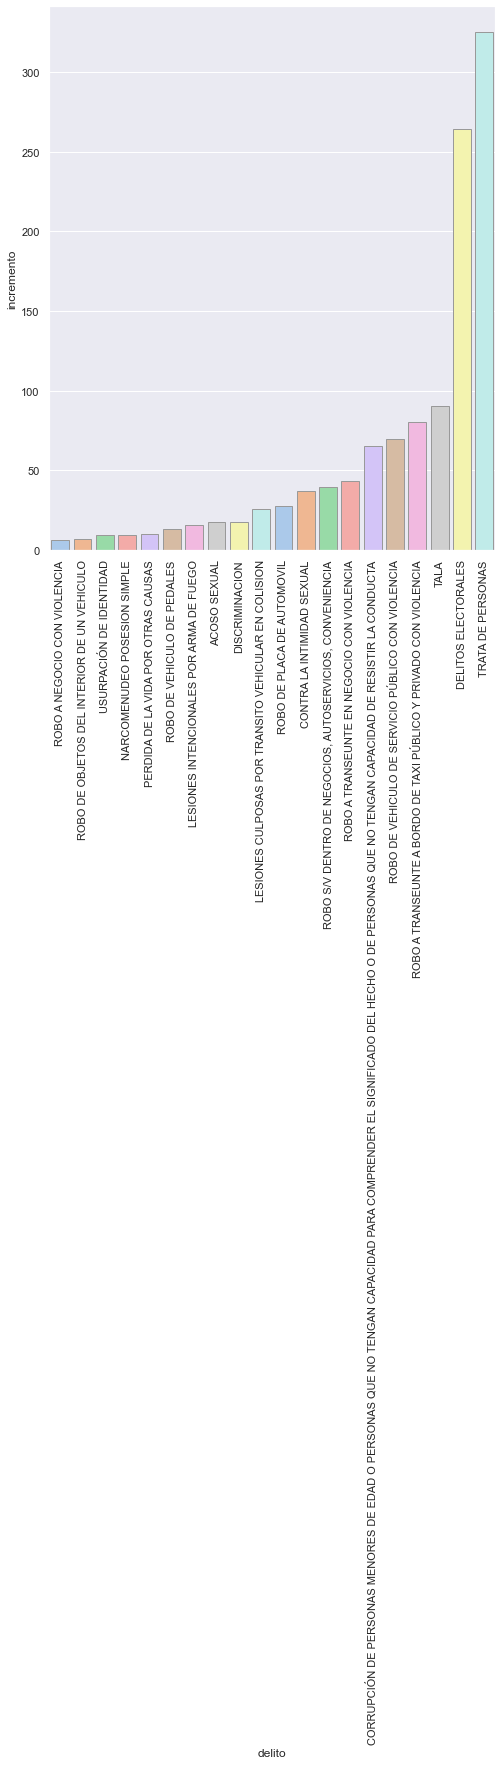

In [122]:
#sns.barplot(x=df_inc.index, y=df_inc.ponderado)
sns.barplot(x="delito", y="incremento", 
            palette="pastel", 
            edgecolor=".6", 
            data=df_inc[df_inc.delta > 10],
            order=df_inc[df_inc.delta > 10].sort_values('incremento').delito
           )
plt.xticks(rotation=90)
plt.show()

En resumen, en 2021, aquellos delitos para los que se abrieron carpeta de investigación y que presentan el mayor incremento porcentual en el último mes registrado y que además hayan incrementado en al menos 10 carpetas son:

1. Trata de personas
2. Delitos Electorales

#### ¿Cuál es la alcaldía que más delitos tiene y cuál es la que menos?. ¿Por qué crees que sea esto?

In [123]:
carpetas.head(3)

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo,mes_carpeta,anio_carpeta
0,2016.0,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01 00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,LAGO PTE.,AMÉRICAS UNIDAS,BENITO JUAREZ,NaN,-99.140215,19.380315,NaN,2.0,2016.0
1,2016.0,Enero,2016-01-31 20:50:00,2016,Febrero,2016-02-01 00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SUR 25 A,GRANJEROS,LOS CIPRESES,IZTAPALAPA,NaN,-99.108403,19.352859,NaN,2.0,2016.0
2,2016.0,Febrero,2016-02-01 00:30:00,2016,Febrero,2016-02-01 01:33:26,NARCOMENUDEO POSESION SIMPLE,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",57,UI-3CD,DELITO DE BAJO IMPACTO,BATALLONES ROJOS,NaN,UNIDAD VICENTE GUERRERO,IZTAPALAPA,NaN,-99.061321,19.356451,NaN,2.0,2016.0


In [142]:
carpetas.groupby(['alcaldia_hechos'])['delito'].count().reset_index().sort_values('delito', 
                                                                                  ascending=False).head(5)

,alcaldia_hechos,delito
140,CUAUHTEMOC,188304
217,IZTAPALAPA,181818
184,GUSTAVO A MADERO,121166
68,BENITO JUAREZ,100539
29,ALVARO OBREGON,82051


In [143]:
carpetas.groupby(['alcaldia_hechos'])['delito'].count().reset_index().sort_values('delito', 
                                                                                  ascending=False).tail(5)

,alcaldia_hechos,delito
372,SAN MIGUEL TOTOLAPAN,1
373,SAN MIGUEL XOXTLA,1
375,SAN PABLO DEL MONTE,1
376,SAN PEDRO ATOYAC,1
0,ABALA,1


In [144]:
carpetas.alcaldia_hechos.nunique()

544

In [151]:
cdmx_alc = list(carpetas.groupby(['alcaldia_hechos'])['delito'].count().reset_index().sort_values('delito', 
                                                                                  ascending=False).head(16)['alcaldia_hechos'])

In [154]:
carpetas[carpetas['alcaldia_hechos'].isin(cdmx_alc)].groupby(['alcaldia_hechos'])['delito'].count().reset_index().sort_values('delito', 
                                                                                  ascending=False).tail(5)

,alcaldia_hechos,delito
15,XOCHIMILCO,37878
12,TLAHUAC,29437
9,LA MAGDALENA CONTRERAS,19719
4,CUAJIMALPA DE MORELOS,17813
11,MILPA ALTA,8533


Se tiene que hay 544 alcaldías incluidas y esto incluye las de otros estados diferentes a la CDMX. La alcaldía con mayor número de delitos registrados es *CUAUHTEMOC* y la que tiene menos es *MILPA ALTA* para la CDMX. Claro que hay alcaldías con solo 1 delito registrado. Parece que la desidad de población es un factor importante para el aumento en el registro de los delitos y otro factor puede ser la existencia de ministerios públicos en los cuáles hacer la denuncia.

#### Dentro de cada alcaldía, cuáles son las tres colonias con más delitos

In [176]:
carpetas.colonia_hechos.isnull().sum()

49227

In [182]:
carpetas.colonia_hechos.nunique()

1661

In [177]:
carpetas.alcaldia_hechos.isnull().sum()

3308

In [183]:
carpetas.alcaldia_hechos.nunique()

544

In [200]:
carpetas.groupby(['alcaldia_hechos','colonia_hechos'])['delito'].count().reset_index().shape

(1860, 3)

In [188]:
# Esto se puede obtener con la estrategia anterior:

df_colonias = carpetas.groupby(['alcaldia_hechos', 
                                'colonia_hechos'])['delito'].count().reset_index().sort_values('delito', 
                                                                                               ascending=False)

In [189]:
df_colonias = df_colonias.sort_values(['alcaldia_hechos','delito'], ascending=False).reset_index(drop=True)

In [191]:
df_colonias.shape

(1860, 3)

In [201]:
df_colonias.groupby(['alcaldia_hechos']).head(1)

,alcaldia_hechos,colonia_hechos,delito
0,ZITACUARO,ZITACUARO CENTRO,1
1,XOCHIMILCO,SAN GREGORIO ATLAPULCO,2435
140,VENUSTIANO CARRANZA,JARDÍN BALBUENA,6520
228,TLAXCALA,TLAXCALA CENTRO,1
229,TLALPAN,SAN ANDRÉS TOTOLTEPEC,4776
448,TLAHUAC,DEL MAR,1765
539,SAN JUAN GUICHICOVI,RAMOS MILLAN - EJIDO,1
540,OAXACA DE JUAREZ,OAXACA CENTRO,1
541,NEZAHUALCOYOTL,VICENTE VILLADA,1
546,NAUCALPAN DE JUAREZ,SAN BARTOLO NAUCALPAN (NAUCALPAN CENTRO) - PUEBLO,2
